In [1]:
import json
import numpy as np
import pandas as pd

In [2]:
with open('validators.json', 'r', encoding='utf-8') as f:
    validators = json.load(f)

In [3]:
with open('frames.json', 'r', encoding='utf-8') as f:
    frames = json.load(f)

In [6]:
epochs = sorted(frames.keys(), key=int)

In [9]:
# Create a table where each column tracks the rewards of a single validator.
reward = lambda v: (v['balance'] - v['effectivebalance']) if v else 0
data = {
    i: [reward(frames[e].get(str(i))) for e in epochs]
    for i in validators.values()
}
xs = pd.DataFrame(data, index=epochs)

# Rename columns.
xs.index.rename('epoch', inplace=True)
xs.columns.rename('validator', inplace=True)

# Convert from Gwei to ETH.
xs = xs.div(1e9)

# Store that.
xs.to_csv('rewards.csv')

In [10]:
# Create a secondary table for analysis.
ys = pd.DataFrame({
    'active': xs.ne(0).sum(axis=1),
    'reward': xs.sum(axis=1),
})
ys['average'] = ys['reward'].div(ys['active']).fillna(0)
start = ys['reward'].eq(0).sum() - 1
ys = ys.iloc[start:]

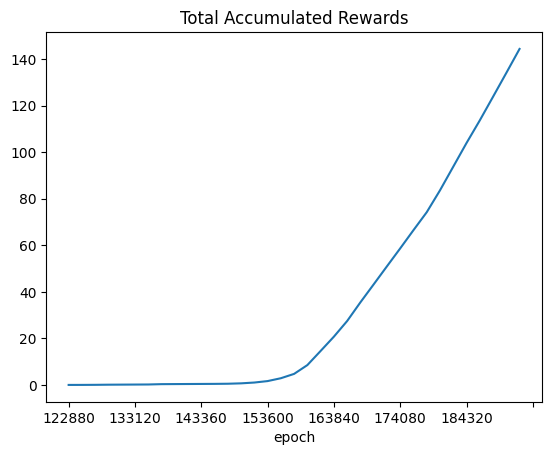

In [11]:
ys['reward'].plot(title='Total Accumulated Rewards');

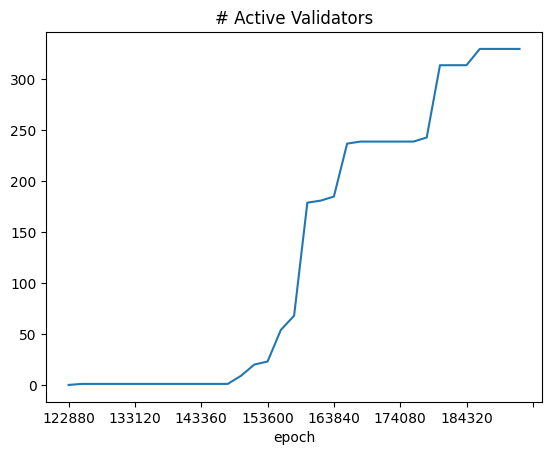

In [12]:
ys['active'].plot(title='# Active Validators');